# Exploratary Data Analysis  -- Correlations with Crashes
## Montgomery County Data

## Load libraries and cleaned datasets

In [105]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [106]:
incidents = pd.read_csv("incidents_clean.csv")

In [107]:
nonmotorists = pd.read_csv("nonmotoristdf_clean.csv")

In [108]:
drivers = pd.read_csv("driverdf_clean.csv", low_memory = False)

In [109]:
maryland = pd.read_csv("marylanddf_clean.csv", low_memory = False)

In [110]:
dcdata = pd.read_csv("crashesDCdf_clean.csv", low_memory = False)

### Describe the Montgomery County data


In [111]:
incidents.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,hit_run,route_type,mile_point,mile_point_direction,...,fixed_object_struck,junction,intersection_type,intersection_area,road_alignment,road_condition,road_division,latitude,longitude,location
0,1,EJ78460055,200017938,Gaithersburg Police,Property Damage Crash,2020-05-02 14:16:00,Yes,UNKNOWN,UNKNOWN,Unknown,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.147956,-77.229616,"(39.14795617, -77.2296164)"
1,2,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.188862,-77.202455,"(39.18886167, -77.202455)"
2,3,HA23890011,20002466,Maryland-National Capital Police,Property Damage Crash,2020-10-14 08:40:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.158697,-77.146791,"(39.15869731, -77.14679055)"
3,4,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,2020-03-03 09:19:00,No,UNKNOWN,UNKNOWN,Unknown,...,OTHER,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.129216,-77.167342,"(39.1292155, -77.16734233)"
4,5,MCP3138002N,200044466,Montgomery County Police,Property Damage Crash,2020-11-11 19:50:00,Yes,County,0.0,East,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.130619,-77.088271,"(39.13061875, -77.08827079)"


In [112]:
incidents_summary = incidents.describe()
incidents_summary

#.describe() only works with numeric columns, so this doesn't tell us much

,Unnamed: 0,lane_number,number_of_lanes,latitude,longitude
count,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000
mean,34383.500000,1.209929,2.066210,39.083623,-77.114498
std,19851.178643,0.980560,1.363726,0.073342,0.100838
min,1.000000,0.000000,0.000000,37.720000,-79.486000
25%,17192.250000,1.000000,1.000000,39.024416,-77.190991
50%,34383.500000,1.000000,2.000000,39.075623,-77.107445
75%,51574.750000,2.000000,3.000000,39.140405,-77.040893
max,68766.000000,8.000000,99.000000,39.990414,-75.527708


In [113]:
# convert date time to date-time type
incidents['crash_date_time'] = pd.to_datetime(incidents['crash_date_time'])


In [114]:
incidents['collision_type']

0             STRAIGHT MOVEMENT ANGLE
1             STRAIGHT MOVEMENT ANGLE
2                                 NaN
3                      SINGLE VEHICLE
4                               OTHER
                     ...             
68761         STRAIGHT MOVEMENT ANGLE
68762                           OTHER
68763    OPPOSITE DIRECTION SIDESWIPE
68764               SAME DIR REAR END
68765                  SINGLE VEHICLE
Name: collision_type, Length: 68766, dtype: object

This is data on the incident itself---information on the drivers or non-motorists involved, including whether or not they were injured and the severity of the injury, is in the non-motorists and drivers datasets.


In [115]:
nonmotorists.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,pedestrian_actions,pedestrian_location,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault,injury_severity,safety_equipment,latitude,longitude,location
0,1,MCP20160048,190026280,Montgomery County Police,Injury Crash,2019-06-02 12:19:00,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,...,NO IMPROPER ACTIONS,SIDEWALK,NaN,LIGHT CLOTHING,No,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)"
1,2,MCP3171000V,190026764,Montgomery County Police,Injury Crash,2019-06-04 21:02:00,Unknown,NaN,Unknown,NaN,...,NO IMPROPER ACTIONS,AT INTERSECTION BUT NO CROSSWALK,NO PED. SIGNAL,UNKNOWN,No,POSSIBLE INJURY,NaN,39.201165,-77.248343,"(39.201165, -77.24834333)"
2,3,MCP3000002N,190026219,Montgomery County Police,Injury Crash,2019-06-01 22:27:00,County,MIDDLEBROOK RD,County,WARING STATION RD,...,OTHER,AT INTERSECTION MARKED CROSSWALK,OBEYED PED. SIGNAL,DARK CLOTHING,No,SUSPECTED MINOR INJURY,NaN,39.175252,-77.253611,"(39.17525182, -77.25361113)"
3,4,EJ7876000N,190026354,Gaithersburg Police,Injury Crash,2019-06-02 22:10:00,Maryland (State),MONTGOMERY VILLAGE AVE,Unknown,SPUR TO LOST KNIFE RD,...,OTHER,ON ROADWAY AT CROSSWALK,DISOBEYED PED. SIGNAL,DARK CLOTHING,Yes,SUSPECTED MINOR INJURY,NONE,39.157775,-77.204002,"(39.157775, -77.20400167)"
4,5,MCP20080062,190023569,Montgomery County Police,Injury Crash,2019-05-18 18:11:00,County,FALLS RD,County,BURBANK DR,...,WRONG WAY RIDING OR WALKING,ON ROADWAY NOT AT CROSSWALK,NaN,LIGHT CLOTHING,Yes,SUSPECTED MINOR INJURY,MC/BIKE HELMET,39.014097,-77.215137,"(39.01409667, -77.21513667)"


In [116]:
nonmotorists.describe()

,Unnamed: 0,local_case_number,latitude,longitude
count,3935.000000,3.935000e+03,3935.000000,3935.000000
mean,1968.000000,1.178792e+08,39.071346,-77.111106
std,1136.080983,8.370594e+07,0.069730,0.093772
min,1.000000,1.705200e+04,38.554005,-79.181926
25%,984.500000,1.603261e+07,39.012206,-77.180374
50%,1968.000000,1.705392e+08,39.061290,-77.098768
75%,2951.500000,1.900242e+08,39.121060,-77.045069
max,3935.000000,2.100105e+08,39.426657,-76.916257


In [117]:
nonmotorists['crash_date_time'] = pd.to_datetime(nonmotorists['crash_date_time'])

nonmotorists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3935 entries, 0 to 3934
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        3935 non-null   int64         
 1   report_number                     3935 non-null   object        
 2   local_case_number                 3935 non-null   int64         
 3   agency_name                       3935 non-null   object        
 4   acrs_report_type                  3935 non-null   object        
 5   crash_date_time                   3935 non-null   datetime64[ns]
 6   route_type                        3935 non-null   object        
 7   road_name                         3061 non-null   object        
 8   cross_street_type                 3935 non-null   object        
 9   cross_street_name                 3060 non-null   object        
 10  off_road_description              874 non-null  

In [118]:
nonmotorists['injury_severity'].unique()

array(['SUSPECTED MINOR INJURY', 'POSSIBLE INJURY',
       'SUSPECTED SERIOUS INJURY', 'NO APPARENT INJURY', 'FATAL INJURY'],
      dtype=object)

Interesting choices for "injury severity."  Barring more information from Montgomery County, I'll assume "no" means minor or no injury and "yes" means severe injury.

In [119]:
drivers.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,speed_limit,driverless_vehicle,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude,longitude,location
0,1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,...,35,No,No,2020,UNKNOWN,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
1,2,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
2,3,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"
3,4,MCP27100039,200016305,Montgomery County Police,Property Damage Crash,2020-04-17 17:00:00,Municipality,E DIAMOND AVE,Municipality,S SUMMIT AVE,...,25,No,No,2011,TOYOTA,4S,NaN,39.140555,-77.193347,"(39.140555, -77.19334667)"
4,5,DD5641000P,200016622,Rockville Police,Property Damage Crash,2020-04-21 06:45:00,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,...,40,No,No,2018,TOYOTA,4S,NO MISUSE,39.066925,-77.154085,"(39.066925, -77.154085)"


In [120]:
drivers.describe()

,Unnamed: 0,speed_limit,vehicle_year,latitude,longitude
count,121918.000000,121918.000000,121918.000000,121918.000000,121918.000000
mean,60959.500000,32.845150,1968.563133,39.082338,-77.112506
std,35194.839397,11.026851,330.898944,0.072441,0.099753
min,1.000000,0.000000,0.000000,37.720000,-79.486000
25%,30480.250000,30.000000,2005.000000,39.023325,-77.188295
50%,60959.500000,35.000000,2010.000000,39.074329,-77.105470
75%,91438.750000,40.000000,2014.000000,39.137990,-77.040108
max,121918.000000,70.000000,9999.000000,39.990414,-75.527708


In [121]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121918 entries, 0 to 121917
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      121918 non-null  int64  
 1   report_number                   121918 non-null  object 
 2   local_case_number               121918 non-null  object 
 3   agency_name                     121918 non-null  object 
 4   acrs_report_type                121918 non-null  object 
 5   crash_date_time                 121918 non-null  object 
 6   route_type                      110115 non-null  object 
 7   road_name                       110715 non-null  object 
 8   cross_street_type               121918 non-null  object 
 9   cross_street_name               110710 non-null  object 
 10  off_road_description            11202 non-null   object 
 11  municipality                    13348 non-null   object 
 12  related_non_moto

In [122]:
drivers['crash_date_time'] = pd.to_datetime(drivers['crash_date_time'])
drivers.info()
drivers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121918 entries, 0 to 121917
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      121918 non-null  int64         
 1   report_number                   121918 non-null  object        
 2   local_case_number               121918 non-null  object        
 3   agency_name                     121918 non-null  object        
 4   acrs_report_type                121918 non-null  object        
 5   crash_date_time                 121918 non-null  datetime64[ns]
 6   route_type                      110115 non-null  object        
 7   road_name                       110715 non-null  object        
 8   cross_street_type               121918 non-null  object        
 9   cross_street_name               110710 non-null  object        
 10  off_road_description            11202 non-null   object 

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,speed_limit,driverless_vehicle,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude,longitude,location
0,1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,...,35,No,No,2020,UNKNOWN,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
1,2,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
2,3,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"
3,4,MCP27100039,200016305,Montgomery County Police,Property Damage Crash,2020-04-17 17:00:00,Municipality,E DIAMOND AVE,Municipality,S SUMMIT AVE,...,25,No,No,2011,TOYOTA,4S,NaN,39.140555,-77.193347,"(39.140555, -77.19334667)"
4,5,DD5641000P,200016622,Rockville Police,Property Damage Crash,2020-04-21 06:45:00,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,...,40,No,No,2018,TOYOTA,4S,NO MISUSE,39.066925,-77.154085,"(39.066925, -77.154085)"


In [123]:
drivers['injury_severity'].unique()

array(['NO APPARENT INJURY', 'POSSIBLE INJURY', 'SUSPECTED MINOR INJURY',
       'SUSPECTED SERIOUS INJURY', 'FATAL INJURY'], dtype=object)

These are definitely clearer than the non-motorists information.

### Merge dataframes into one

In [124]:
moCoDetails = incidents.merge(drivers, on = 'report_number', how = 'outer')
moCoDetails.columns
moCoDetails.info()
moCoDetails.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122369 entries, 0 to 122368
Data columns (total 88 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0_x                    122368 non-null  float64       
 1   report_number                   122369 non-null  object        
 2   local_case_number_x             122368 non-null  object        
 3   agency_name_x                   122368 non-null  object        
 4   acrs_report_type_x              122368 non-null  object        
 5   crash_date_time_x               122368 non-null  datetime64[ns]
 6   hit_run                         122366 non-null  object        
 7   route_type_x                    122368 non-null  object        
 8   mile_point                      122368 non-null  object        
 9   mile_point_direction            122368 non-null  object        
 10  lane_direction                  122368 non-null  object 

,Unnamed: 0_x,report_number,local_case_number_x,agency_name_x,acrs_report_type_x,crash_date_time_x,hit_run,route_type_x,mile_point,mile_point_direction,...,speed_limit,driverless_vehicle,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude_y,longitude_y,location_y
0,1.0,EJ78460055,200017938,Gaithersburg Police,Property Damage Crash,2020-05-02 14:16:00,Yes,UNKNOWN,UNKNOWN,Unknown,...,5.0,No,No,1999.0,FORD,EXPEDITION,UNKNOWN,39.147956,-77.229616,"(39.14795617, -77.2296164)"
1,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,15.0,No,No,2016.0,NISSAN,SENTRA,NO MISUSE,39.188862,-77.202455,"(39.18886167, -77.202455)"
2,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,15.0,No,No,2012.0,NISSAN,MURANO,NO MISUSE,39.188862,-77.202455,"(39.18886167, -77.202455)"
3,3.0,HA23890011,20002466,Maryland-National Capital Police,Property Damage Crash,2020-10-14 08:40:00,No,UNKNOWN,UNKNOWN,Unknown,...,10.0,No,No,2016.0,FORD,TK,NaN,39.158697,-77.146791,"(39.15869731, -77.14679055)"
4,4.0,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,2020-03-03 09:19:00,No,UNKNOWN,UNKNOWN,Unknown,...,5.0,No,No,2019.0,FORD,F350,NO MISUSE,39.129216,-77.167342,"(39.1292155, -77.16734233)"


In [125]:
moCoDetails = moCoDetails.merge(nonmotorists, on = 'report_number', how ='outer')
moCoDetails.info()
moCoDetails.to_csv("moCoDetails.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122559 entries, 0 to 122558
Columns: 120 entries, Unnamed: 0_x to location
dtypes: datetime64[ns](3), float64(14), object(103)
memory usage: 113.1+ MB


In [126]:
moCoDetails.columns

Index(['Unnamed: 0_x', 'report_number', 'local_case_number_x', 'agency_name_x',
       'acrs_report_type_x', 'crash_date_time_x', 'hit_run', 'route_type_x',
       'mile_point', 'mile_point_direction',
       ...
       'pedestrian_actions', 'pedestrian_location',
       'pedestrian_obeyed_traffic_signal', 'pedestrian_visibility',
       'at_fault_y', 'injury_severity_y', 'safety_equipment', 'latitude',
       'longitude', 'location'],
      dtype='object', length=120)

In [127]:
moCoDetails.crash_date_time_x

0        2020-05-02 14:16:00
1        2020-09-15 15:33:00
2        2020-09-15 15:33:00
3        2020-10-14 08:40:00
4        2020-03-03 09:19:00
                 ...        
122554   2021-03-08 14:15:00
122555   2021-03-08 14:15:00
122556   2021-03-08 14:15:00
122557   2021-03-17 21:15:00
122558                   NaT
Name: crash_date_time_x, Length: 122559, dtype: datetime64[ns]

In [128]:
moCoDetails['year'] = pd.DatetimeIndex(moCoDetails['crash_date_time_x']).year.astype('Int64')
moCoDetails['month'] = pd.DatetimeIndex(moCoDetails['crash_date_time_x']).month.astype('Int64')
moCoDetails.head()

,Unnamed: 0_x,report_number,local_case_number_x,agency_name_x,acrs_report_type_x,crash_date_time_x,hit_run,route_type_x,mile_point,mile_point_direction,...,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault_y,injury_severity_y,safety_equipment,latitude,longitude,location,year,month
0,1.0,EJ78460055,200017938,Gaithersburg Police,Property Damage Crash,2020-05-02 14:16:00,Yes,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5
1,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,9
2,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,9
3,3.0,HA23890011,20002466,Maryland-National Capital Police,Property Damage Crash,2020-10-14 08:40:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,10
4,4.0,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,2020-03-03 09:19:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3


In [129]:
moCoDetails['month_year'] = pd.to_datetime(moCoDetails['crash_date_time_x']).dt.to_period('M')
moCoDetails.head()

,Unnamed: 0_x,report_number,local_case_number_x,agency_name_x,acrs_report_type_x,crash_date_time_x,hit_run,route_type_x,mile_point,mile_point_direction,...,pedestrian_visibility,at_fault_y,injury_severity_y,safety_equipment,latitude,longitude,location,year,month,month_year
0,1.0,EJ78460055,200017938,Gaithersburg Police,Property Damage Crash,2020-05-02 14:16:00,Yes,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5,2020-05
1,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,9,2020-09
2,2.0,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,9,2020-09
3,3.0,HA23890011,20002466,Maryland-National Capital Police,Property Damage Crash,2020-10-14 08:40:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,10,2020-10
4,4.0,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,2020-03-03 09:19:00,No,UNKNOWN,UNKNOWN,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3,2020-03


In [130]:
 moCoDetails.groupby('month_year').count()

,Unnamed: 0_x,report_number,local_case_number_x,agency_name_x,acrs_report_type_x,crash_date_time_x,hit_run,route_type_x,mile_point,mile_point_direction,...,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault_y,injury_severity_y,safety_equipment,latitude,longitude,location,year,month
month_year,,,,,,,,,,,,,,,,,,,,,
2015-01,1632,1632,1632,1632,1632,1632,1632,1632,1632,1632,...,36,51,0,51,19,51,51,51,1632,1632
2015-02,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,...,28,45,1,45,17,45,45,45,1576,1576
2015-03,1452,1452,1452,1452,1452,1452,1451,1452,1452,1452,...,32,45,2,45,16,45,45,45,1452,1452
2015-04,1541,1541,1541,1541,1541,1541,1540,1541,1541,1541,...,19,40,0,40,14,40,40,40,1541,1541
2015-05,1859,1859,1859,1859,1859,1859,1859,1859,1859,1859,...,40,63,1,63,28,63,63,63,1859,1859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,...,31,43,43,43,34,43,43,43,1161,1161
2020-12,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,...,22,35,35,35,23,35,35,35,1250,1250
2021-01,933,933,933,933,933,933,933,933,933,933,...,21,33,33,33,26,33,33,33,933,933


In [131]:
# Create new columns with day of week and time of day---Monday = 0

moCoDetails['year'] = moCoDetails['crash_date_time_x'].dt.year.astype('Int64')
moCoDetails['month'] = moCoDetails['crash_date_time_x'].dt.month_name()
moCoDetails['weekday'] = moCoDetails['crash_date_time_x'].dt.day_name()
moCoDetails['time'] = moCoDetails['crash_date_time_x'].dt.time
moCoDetails['hour'] = moCoDetails['crash_date_time_x'].dt.hour.astype('Int64')
moCoDetails[['year', 'month', 'weekday', 'time', 'hour']]

,year,month,weekday,time,hour
0,2020,May,Saturday,14:16:00,14
1,2020,September,Tuesday,15:33:00,15
2,2020,September,Tuesday,15:33:00,15
3,2020,October,Wednesday,08:40:00,8
4,2020,March,Tuesday,09:19:00,9
...,...,...,...,...,...
122554,2021,March,Monday,14:15:00,14
122555,2021,March,Monday,14:15:00,14
122556,2021,March,Monday,14:15:00,14
122557,2021,March,Wednesday,21:15:00,21


In [218]:
# Pull out fatal and serious injury crashes

isFatalMoCo = moCoDetails['acrs_report_type'] == 'Fatal Crash'
isFatalMoCo
fatalMoCo = moCoDetails[isFatalMoCo]


isInjuryMoCo = moCoDetails['acrs_report_type'] == 'Injury Crash'
isInjuryMoCo
injuryMoCo = moCoDetails[isInjuryMoCo]

## Numbers of Crashes

### Crashes by Year

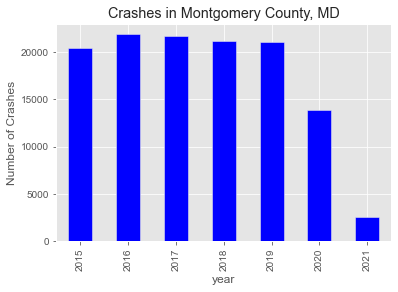

In [133]:
moCoCrashesbyTime = moCoDetails[['year','report_number']]
moCoCrashesbyTime.groupby('year').count().plot(kind = 'bar', legend = None, color = 'blue')
plt.style.use('ggplot')
plt.ylabel("Number of Crashes")
plt.title("Crashes in Montgomery County, MD")
plt.show()





In [134]:
moCoCrashesbyTime['year'].min()

2015

In [135]:
moCoCrashesbyTime.groupby('year').count()

,report_number
year,
2015,20449
2016,21879
2017,21669
2018,21116
2019,21024
2020,13857
2021,2564


### Crashes by Month

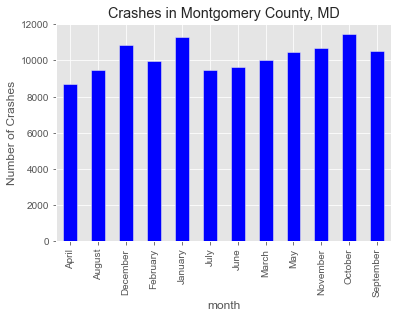

In [136]:

moCoCrashesbyMonth = moCoDetails[['month','report_number']]

moCoCrashesbyMonth.groupby('month').count().plot(kind = 'bar', legend = None, color = 'blue')
plt.style.use('ggplot')
plt.ylabel("Number of Crashes")
plt.title("Crashes in Montgomery County, MD")
plt.show()



### Crashes by Day of Week

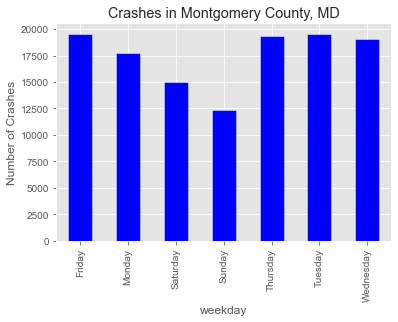

In [137]:

moCoCrashesbyWeekday = moCoDetails[['weekday','report_number']]

moCoCrashesbyWeekday.groupby('weekday').count().plot(kind = 'bar', legend = None, color = 'blue')
plt.style.use('ggplot')
plt.ylabel("Number of Crashes")
plt.title("Crashes in Montgomery County, MD")
plt.show()



### Crashes by Time (hour of day---24 hour clock)

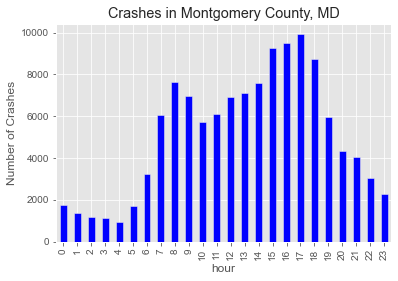

In [138]:
moCoCrashesbyHour = moCoDetails[['hour','report_number']]

moCoCrashesbyHour.groupby('hour').count().plot(kind = 'bar', legend = None, color = 'blue')
plt.style.use('ggplot')
plt.ylabel("Number of Crashes")
plt.title("Crashes in Montgomery County, MD")
plt.show()

## Statistical analysis of when crashes are most likely

In [143]:
# simple tables of types of crash by hour of day

timestudy = pd.crosstab(moCoDetails.injury_severity_x, moCoDetails.hour)
timestudy

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
injury_severity_x,,,,,,,,,,,,,,,,,,,,,
FATAL INJURY,4,5,3,1,4,4,2,5,3,2,...,3,7,3,1,10,5,5,6,4,5
NO APPARENT INJURY,1426,1093,937,899,744,1288,2532,4847,6183,5584,...,6176,7634,7844,8176,7173,4946,3512,3284,2504,1854
POSSIBLE INJURY,134,126,92,79,109,205,410,694,819,775,...,792,957,902,995,907,521,404,413,247,200
SUSPECTED MINOR INJURY,122,116,109,97,87,155,261,464,555,515,...,547,577,654,670,579,449,343,277,254,178
SUSPECTED SERIOUS INJURY,20,17,22,12,8,24,36,52,73,60,...,56,73,67,61,54,44,44,35,28,33


In [208]:
# simple table of types of crash by hour of day and day of week

pd.set_option('display.max_rows', 741)
grouped = moCoDetails.groupby(['acrs_report_type', 'weekday','hour']).size()
grouped

acrs_report_type       weekday    hour
Fatal Crash            Friday     3        1
                                  4        1
                                  5        1
                                  6        1
                                  7        2
                                  14       1
                                  17       1
                                  18       1
                                  20       1
                                  21       3
                                  22       1
                       Monday     5        3
                                  6        1
                                  11       1
                                  17       1
                                  18       4
                                  19       1
                                  20       1
                       Saturday   0        1
                                  1        2
                                  2        2
                

#### Narrowing in on fatal crashes

In [227]:
# fatal crashes by hour and weekday

fatalMoCo.groupby(['weekday', 'hour']).size()

weekday    hour
Friday     3       1
           4       1
           5       1
           6       1
           7       2
           14      1
           17      1
           18      1
           20      1
           21      3
           22      1
Monday     5       3
           6       1
           11      1
           17      1
           18      4
           19      1
           20      1
Saturday   0       1
           1       2
           2       2
           3       1
           10      1
           18      1
           21      4
           22      1
           23      2
Sunday     0       1
           3       2
           8       1
           11      1
           13      1
           18      1
           19      2
           20      1
Thursday   6       2
           9       1
           10      1
           12      1
           14      2
           15      1
           16      1
           17      1
           18      3
           21      2
           23      1
Tuesday    3      

In [232]:
# fatal crashes by weekday

fatalMoCo.groupby(['weekday']).size()

weekday
Friday       14
Monday       12
Saturday     15
Sunday       10
Thursday     16
Tuesday      11
Wednesday    15
dtype: int64

#### Injury crashes

In [234]:
# injury crashes by weekday and hour

injuryMoCo.groupby(['weekday', 'hour']).size()

weekday    hour
Friday     0        2
           1        1
           2        4
           3        1
           4        2
           5        7
           6       18
           7       37
           8       34
           9       24
           10      26
           11      23
           12      30
           13      31
           14      38
           15      36
           16      52
           17      54
           18      71
           19      42
           20      32
           21      29
           22       8
           23       7
Monday     2        3
           4        2
           5        9
           6       18
           7       37
           8       29
           9       24
           10      22
           11      26
           12      22
           13      37
           14      36
           15      48
           16      34
           17      43
           18      55
           19      39
           20      29
           21      13
           22       9
           23   

In [235]:
# injury crashes by weekday

injuryMoCo.groupby(['weekday']).size()

weekday
Friday       609
Monday       537
Saturday     434
Sunday       346
Thursday     563
Tuesday      595
Wednesday    577
dtype: int64

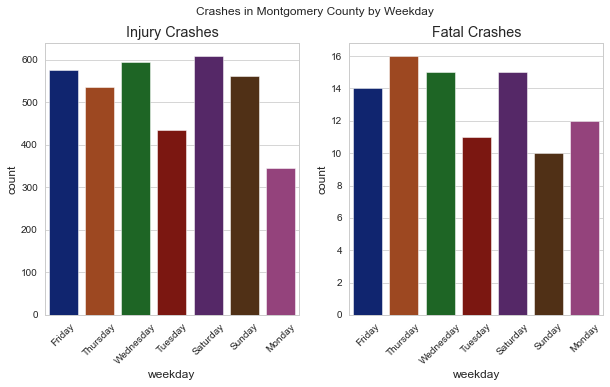

In [296]:
# Filter by fatal and severe injuries

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Crashes in Montgomery County by Weekday')
axes[0].set_title('Injury Crashes')
axes[1].set_title('Fatal Crashes')

sns.set_style('whitegrid')

sns.countplot(injuryMoCo['weekday'], ax = axes[0])
sns.countplot(fatalMoCo['weekday'], ax = axes[1])

axes[0].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='x', labelrotation=45)

#moCoCrashesbyHour = moCoDetails[['weekday','report_number']]
#plt.bar(injuryMoCo.groupby(['weekday']).count())
#plt.bar(fatalMoCo.groupby(['weekday']).count())
#plt.style.use('ggplot')
#plt.ylabel("Number of Crashes")
#plt.title("Crashes in Montgomery County, MD")
#plt.show()

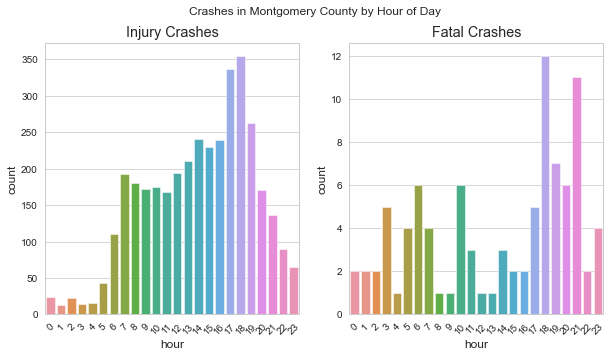

In [300]:
# Filter by fatal and severe injuries

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Crashes in Montgomery County by Hour of Day')
axes[0].set_title('Injury Crashes')
axes[1].set_title('Fatal Crashes')

sns.set_palette('Paired_r')
sns.set_style('whitegrid')

sns.countplot(injuryMoCo['hour'], ax = axes[0])
sns.countplot(fatalMoCo['hour'], ax = axes[1])

axes[0].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='x', labelrotation=45)

## Crashes by Severity

In [145]:
moCoCrashesbySeverity = moCoDetails[['year', 'report_number', 'acrs_report_type']]

In [146]:
moCoCrashesbySeverity['acrs_report_type']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
122554    NaN
122555    NaN
122556    NaN
122557    NaN
122558    NaN
Name: acrs_report_type, Length: 122559, dtype: object

Why is "acrs_report_type" now NaN?

Working with the merged dataframe didn't really help me, I'm going to go back to working with each frame separately, and then combine only the entries I need.

In [147]:
incidents.columns

Index(['Unnamed: 0', 'report_number', 'local_case_number', 'agency_name',
       'acrs_report_type', 'crash_date_time', 'hit_run', 'route_type',
       'mile_point', 'mile_point_direction', 'lane_direction', 'lane_number',
       'lane_type', 'number_of_lanes', 'direction', 'distance',
       'distance_unit', 'road_grade', 'nontraffic', 'road_name',
       'cross_street_type', 'cross_street_name', 'off_road_description',
       'municipality', 'related_non_motorist', 'at_fault', 'collision_type',
       'weather', 'surface_condition', 'light', 'traffic_control',
       'driver_substance_abuse', 'non_motorist_substance_abuse',
       'first_harmful_event', 'second_harmful_event', 'fixed_object_struck',
       'junction', 'intersection_type', 'intersection_area', 'road_alignment',
       'road_condition', 'road_division', 'latitude', 'longitude', 'location'],
      dtype='object')

In [148]:
incidents['acrs_report_type']

0        Property Damage Crash
1                 Injury Crash
2        Property Damage Crash
3        Property Damage Crash
4        Property Damage Crash
                 ...          
68761    Property Damage Crash
68762    Property Damage Crash
68763    Property Damage Crash
68764    Property Damage Crash
68765    Property Damage Crash
Name: acrs_report_type, Length: 68766, dtype: object

In [149]:
# Add a column for year
incidents['year'] = pd.DatetimeIndex(incidents['crash_date_time']).year
incidents.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,hit_run,route_type,mile_point,mile_point_direction,...,junction,intersection_type,intersection_area,road_alignment,road_condition,road_division,latitude,longitude,location,year
0,1,EJ78460055,200017938,Gaithersburg Police,Property Damage Crash,2020-05-02 14:16:00,Yes,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.147956,-77.229616,"(39.14795617, -77.2296164)",2020
1,2,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.188862,-77.202455,"(39.18886167, -77.202455)",2020
2,3,HA23890011,20002466,Maryland-National Capital Police,Property Damage Crash,2020-10-14 08:40:00,No,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.158697,-77.146791,"(39.15869731, -77.14679055)",2020
3,4,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,2020-03-03 09:19:00,No,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.129216,-77.167342,"(39.1292155, -77.16734233)",2020
4,5,MCP3138002N,200044466,Montgomery County Police,Property Damage Crash,2020-11-11 19:50:00,Yes,County,0.0,East,...,UNKNOWN,UNKNOWN,UNKNOWN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.130619,-77.088271,"(39.13061875, -77.08827079)",2020


In [150]:
# Add a column for month---commented out because I did this above
#incidents['month'] = pd.DatetimeIndex(incidents['crash_date_time']).month
#incidents.head()

In [151]:
# Add a column for month and year
incidents['month_year'] = pd.to_datetime(incidents['crash_date_time']).dt.to_period('M')
incidents.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,hit_run,route_type,mile_point,mile_point_direction,...,intersection_type,intersection_area,road_alignment,road_condition,road_division,latitude,longitude,location,year,month_year
0,1,EJ78460055,200017938,Gaithersburg Police,Property Damage Crash,2020-05-02 14:16:00,Yes,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.147956,-77.229616,"(39.14795617, -77.2296164)",2020,2020-05
1,2,MCP3245000H,200036179,Montgomery County Police,Injury Crash,2020-09-15 15:33:00,No,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.188862,-77.202455,"(39.18886167, -77.202455)",2020,2020-09
2,3,HA23890011,20002466,Maryland-National Capital Police,Property Damage Crash,2020-10-14 08:40:00,No,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.158697,-77.146791,"(39.15869731, -77.14679055)",2020,2020-10
3,4,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,2020-03-03 09:19:00,No,UNKNOWN,UNKNOWN,Unknown,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,39.129216,-77.167342,"(39.1292155, -77.16734233)",2020,2020-03
4,5,MCP3138002N,200044466,Montgomery County Police,Property Damage Crash,2020-11-11 19:50:00,Yes,County,0.0,East,...,UNKNOWN,UNKNOWN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.130619,-77.088271,"(39.13061875, -77.08827079)",2020,2020-11


In [152]:
incidentsAnnual = incidents[['year', 'acrs_report_type', 'report_number', 'related_non_motorist']]

In [153]:
yearlydf= incidentsAnnual.groupby(['year','acrs_report_type']).size()
yearlydf

year  acrs_report_type     
2015  Fatal Crash                34
      Injury Crash             4159
      Property Damage Crash    7275
2016  Fatal Crash                29
      Injury Crash             4424
      Property Damage Crash    7648
2017  Fatal Crash                26
      Injury Crash             4315
      Property Damage Crash    7763
2018  Fatal Crash                29
      Injury Crash             4208
      Property Damage Crash    7629
2019  Fatal Crash                32
      Injury Crash             4030
      Property Damage Crash    7598
2020  Fatal Crash                40
      Injury Crash             2656
      Property Damage Crash    5364
2021  Fatal Crash                 2
      Injury Crash              444
      Property Damage Crash    1061
dtype: int64

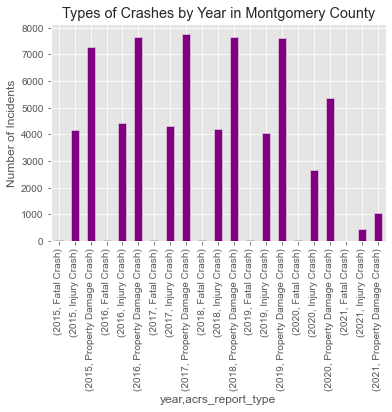

In [154]:
fig, ax = plt.subplots(1)
ax.set(title="Types of Crashes by Year in Montgomery County", 
      ylabel="Number of Incidents",
      xlabel="Type of Crash")



yearlydf.plot.bar(color = 'purple')



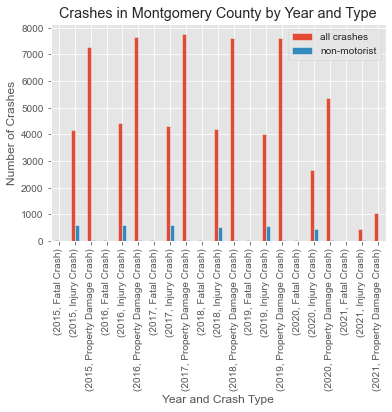

In [155]:
incidentsAnnual.groupby(['year','acrs_report_type']).count().plot(kind='bar')
plt.title("Crashes in Montgomery County by Year and Type")
plt.ylabel("Number of Crashes")
plt.xlabel("Year and Crash Type")
plt.legend(['all crashes', 'non-motorist'])

In [156]:
isFatal = incidentsAnnual['acrs_report_type'] == 'Fatal Crash'
isFatal

0        False
1        False
2        False
3        False
4        False
         ...  
68761    False
68762    False
68763    False
68764    False
68765    False
Name: acrs_report_type, Length: 68766, dtype: bool

In [157]:
fatalIncidents = incidentsAnnual[isFatal]
fatalIncidents

,year,acrs_report_type,report_number,related_non_motorist
215,2019,Fatal Crash,EJ7869002Y,PEDESTRIAN
1679,2020,Fatal Crash,MCP24920019,PEDESTRIAN
1738,2020,Fatal Crash,MCP3118002T,NaN
1886,2019,Fatal Crash,MCP24920012,NaN
1945,2019,Fatal Crash,MCP2563000Y,NaN
...,...,...,...,...
67797,2020,Fatal Crash,MCP2348005X,NaN
68026,2020,Fatal Crash,MCP2348005Z,NaN
68111,2020,Fatal Crash,MCP2492001J,NaN
68539,2021,Fatal Crash,MCP20080089,PEDESTRIAN


In [158]:
fatalIncidents.groupby(['year']).size()

year
2015    34
2016    29
2017    26
2018    29
2019    32
2020    40
2021     2
dtype: int64

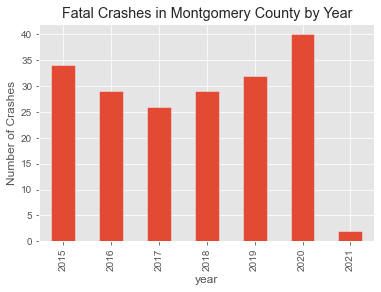

In [159]:
plt.title("Fatal Crashes in Montgomery County by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")

fatalIncidents.groupby(['year']).size().plot(kind = 'bar')
plt.show()

#### What type of crashes are most likely to be fatal

year  related_non_motorist
2015  BICYCLIST                3
      PEDESTRIAN              11
2016  BICYCLIST                3
      OTHER CONVEYANCE         1
      PEDESTRIAN               7
2017  OTHER CONVEYANCE         1
      PEDESTRIAN              11
2018  BICYCLIST                1
      PEDESTRIAN              15
2019  BICYCLIST                1
      PEDESTRIAN              13
2020  BICYCLIST                1
      OTHER                    1
      OTHER CONVEYANCE         1
      PEDESTRIAN              14
2021  PEDESTRIAN               2
dtype: int64

Fatal Incidents increased in 2019, obviously not the goal of the Vision Zero plan.  Let's look at the severe injuries.

In [160]:
isInjury = incidentsAnnual['acrs_report_type']== "Injury Crash"
injuryIncidents = incidentsAnnual[isInjury]
injuryIncidents

,year,acrs_report_type,report_number,related_non_motorist
1,2020,Injury Crash,MCP3245000H,NaN
11,2020,Injury Crash,MCP27270029,NaN
14,2020,Injury Crash,MCP31730016,NaN
16,2020,Injury Crash,MCP3111002K,BICYCLIST
17,2020,Injury Crash,MCP11130036,NaN
...,...,...,...,...
68740,2021,Injury Crash,MCP3165002M,NaN
68748,2021,Injury Crash,MCP2923007J,NaN
68749,2021,Injury Crash,EJ7889000K,NaN
68757,2021,Injury Crash,MCP3127001P,NaN


In [161]:
injuryIncidents.groupby('year').size()

year
2015    4159
2016    4424
2017    4315
2018    4208
2019    4030
2020    2656
2021     444
dtype: int64

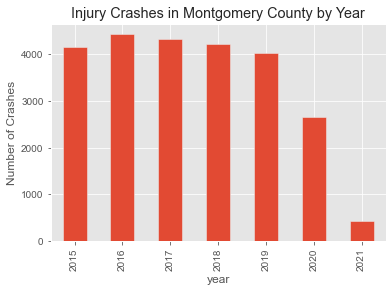

In [162]:
plt.title("Injury Crashes in Montgomery County by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")

injuryIncidents.groupby(['year']).size().plot(kind = 'bar')
plt.show()

Injury crashes decreased, while the number of fatal crashes increased.  What type of crashes were most likely to be fatal?

Examine the "related_non_motorist" column in the fatal incidents dataframe to see what happened with the numbers of non-motorists killed in accidents.

In [163]:
fatalIncidents.groupby(['year', 'related_non_motorist']).size()

year  related_non_motorist
2015  BICYCLIST                3
      PEDESTRIAN              11
2016  BICYCLIST                3
      OTHER CONVEYANCE         1
      PEDESTRIAN               7
2017  OTHER CONVEYANCE         1
      PEDESTRIAN              11
2018  BICYCLIST                1
      PEDESTRIAN              15
2019  BICYCLIST                1
      PEDESTRIAN              13
2020  BICYCLIST                1
      OTHER                    1
      OTHER CONVEYANCE         1
      PEDESTRIAN              14
2021  PEDESTRIAN               2
dtype: int64

See if this matches the information in the nonmotorists dataframe.

In [164]:
nonmotorists['year'] = pd.DatetimeIndex(nonmotorists['crash_date_time']).year
nonmotorists.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,pedestrian_location,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault,injury_severity,safety_equipment,latitude,longitude,location,year
0,1,MCP20160048,190026280,Montgomery County Police,Injury Crash,2019-06-02 12:19:00,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,...,SIDEWALK,NaN,LIGHT CLOTHING,No,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)",2019
1,2,MCP3171000V,190026764,Montgomery County Police,Injury Crash,2019-06-04 21:02:00,Unknown,NaN,Unknown,NaN,...,AT INTERSECTION BUT NO CROSSWALK,NO PED. SIGNAL,UNKNOWN,No,POSSIBLE INJURY,NaN,39.201165,-77.248343,"(39.201165, -77.24834333)",2019
2,3,MCP3000002N,190026219,Montgomery County Police,Injury Crash,2019-06-01 22:27:00,County,MIDDLEBROOK RD,County,WARING STATION RD,...,AT INTERSECTION MARKED CROSSWALK,OBEYED PED. SIGNAL,DARK CLOTHING,No,SUSPECTED MINOR INJURY,NaN,39.175252,-77.253611,"(39.17525182, -77.25361113)",2019
3,4,EJ7876000N,190026354,Gaithersburg Police,Injury Crash,2019-06-02 22:10:00,Maryland (State),MONTGOMERY VILLAGE AVE,Unknown,SPUR TO LOST KNIFE RD,...,ON ROADWAY AT CROSSWALK,DISOBEYED PED. SIGNAL,DARK CLOTHING,Yes,SUSPECTED MINOR INJURY,NONE,39.157775,-77.204002,"(39.157775, -77.20400167)",2019
4,5,MCP20080062,190023569,Montgomery County Police,Injury Crash,2019-05-18 18:11:00,County,FALLS RD,County,BURBANK DR,...,ON ROADWAY NOT AT CROSSWALK,NaN,LIGHT CLOTHING,Yes,SUSPECTED MINOR INJURY,MC/BIKE HELMET,39.014097,-77.215137,"(39.01409667, -77.21513667)",2019


In [165]:
nonmotorists['month'] = pd.DatetimeIndex(nonmotorists['crash_date_time']).month
nonmotorists.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,pedestrian_obeyed_traffic_signal,pedestrian_visibility,at_fault,injury_severity,safety_equipment,latitude,longitude,location,year,month
0,1,MCP20160048,190026280,Montgomery County Police,Injury Crash,2019-06-02 12:19:00,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,...,NaN,LIGHT CLOTHING,No,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)",2019,6
1,2,MCP3171000V,190026764,Montgomery County Police,Injury Crash,2019-06-04 21:02:00,Unknown,NaN,Unknown,NaN,...,NO PED. SIGNAL,UNKNOWN,No,POSSIBLE INJURY,NaN,39.201165,-77.248343,"(39.201165, -77.24834333)",2019,6
2,3,MCP3000002N,190026219,Montgomery County Police,Injury Crash,2019-06-01 22:27:00,County,MIDDLEBROOK RD,County,WARING STATION RD,...,OBEYED PED. SIGNAL,DARK CLOTHING,No,SUSPECTED MINOR INJURY,NaN,39.175252,-77.253611,"(39.17525182, -77.25361113)",2019,6
3,4,EJ7876000N,190026354,Gaithersburg Police,Injury Crash,2019-06-02 22:10:00,Maryland (State),MONTGOMERY VILLAGE AVE,Unknown,SPUR TO LOST KNIFE RD,...,DISOBEYED PED. SIGNAL,DARK CLOTHING,Yes,SUSPECTED MINOR INJURY,NONE,39.157775,-77.204002,"(39.157775, -77.20400167)",2019,6
4,5,MCP20080062,190023569,Montgomery County Police,Injury Crash,2019-05-18 18:11:00,County,FALLS RD,County,BURBANK DR,...,NaN,LIGHT CLOTHING,Yes,SUSPECTED MINOR INJURY,MC/BIKE HELMET,39.014097,-77.215137,"(39.01409667, -77.21513667)",2019,5


In [166]:
# Add a column for month and year
nonmotorists['month_year'] = pd.to_datetime(nonmotorists['crash_date_time']).dt.to_period('M')
nonmotorists.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,pedestrian_visibility,at_fault,injury_severity,safety_equipment,latitude,longitude,location,year,month,month_year
0,1,MCP20160048,190026280,Montgomery County Police,Injury Crash,2019-06-02 12:19:00,Maryland (State),ROCKVILLE PIKE,Municipality,ROLLINS AVE,...,LIGHT CLOTHING,No,SUSPECTED MINOR INJURY,NONE,38.953000,-77.338000,"(38.953, -77.338)",2019,6,2019-06
1,2,MCP3171000V,190026764,Montgomery County Police,Injury Crash,2019-06-04 21:02:00,Unknown,NaN,Unknown,NaN,...,UNKNOWN,No,POSSIBLE INJURY,NaN,39.201165,-77.248343,"(39.201165, -77.24834333)",2019,6,2019-06
2,3,MCP3000002N,190026219,Montgomery County Police,Injury Crash,2019-06-01 22:27:00,County,MIDDLEBROOK RD,County,WARING STATION RD,...,DARK CLOTHING,No,SUSPECTED MINOR INJURY,NaN,39.175252,-77.253611,"(39.17525182, -77.25361113)",2019,6,2019-06
3,4,EJ7876000N,190026354,Gaithersburg Police,Injury Crash,2019-06-02 22:10:00,Maryland (State),MONTGOMERY VILLAGE AVE,Unknown,SPUR TO LOST KNIFE RD,...,DARK CLOTHING,Yes,SUSPECTED MINOR INJURY,NONE,39.157775,-77.204002,"(39.157775, -77.20400167)",2019,6,2019-06
4,5,MCP20080062,190023569,Montgomery County Police,Injury Crash,2019-05-18 18:11:00,County,FALLS RD,County,BURBANK DR,...,LIGHT CLOTHING,Yes,SUSPECTED MINOR INJURY,MC/BIKE HELMET,39.014097,-77.215137,"(39.01409667, -77.21513667)",2019,5,2019-05


In [167]:
nonmotorists.groupby(['year', 'acrs_report_type']).size()

year  acrs_report_type     
2015  Fatal Crash               14
      Injury Crash             613
      Property Damage Crash     47
2016  Fatal Crash               11
      Injury Crash             619
      Property Damage Crash     46
2017  Fatal Crash               12
      Injury Crash             650
      Property Damage Crash     48
2018  Fatal Crash               16
      Injury Crash             575
      Property Damage Crash     39
2019  Fatal Crash               15
      Injury Crash             598
      Property Damage Crash     43
2020  Fatal Crash               17
      Injury Crash             460
      Property Damage Crash     50
2021  Fatal Crash                2
      Injury Crash              56
      Property Damage Crash      4
dtype: int64

Good news!  The numbers of fatalities in the nonmotorists dataframe match the numbers in the fatal incidents above, so we can just work with the nonmotorists dataframe to see how those numbers changed over time.

In [168]:
# Extract the fatal crashes from this dataframe
isFatal = nonmotorists['acrs_report_type'] == 'Fatal Crash'
isFatal
nonMotoristFatalIncidents = nonmotorists[isFatal]
nonMotoristFatalIncidents

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,pedestrian_visibility,at_fault,injury_severity,safety_equipment,latitude,longitude,location,year,month,month_year
96,97,MCP24920019,200002735,Montgomery County Police,Fatal Crash,2020-01-16 18:33:00,Maryland (State),ROCKVILLE PIKE,Municipality,WOOTTON PKWY,...,DARK CLOTHING,Yes,FATAL INJURY,NaN,39.077990,-77.140867,"(39.07798974, -77.140867)",2020,1,2020-01
294,295,MCP2492000B,15028338,Montgomery County Police,Fatal Crash,2015-06-11 09:00:00,County,CRABBS BRANCH WAY,County,REDLAND RD,...,DARK CLOTHING,NaN,FATAL INJURY,NONE,39.121038,-77.158527,"(39.12103805, -77.15852737)",2015,6,2015-06
302,303,MCP2683003M,190006583,Montgomery County Police,Fatal Crash,2019-02-10 18:47:00,County,MONTGOMERY VILLAGE AVE,Maryland (State),MIDCOUNTY HWY,...,DARK CLOTHING,Unknown,FATAL INJURY,NONE,39.157968,-77.201475,"(39.15796833, -77.201475)",2019,2,2019-02
304,305,MCP20010017,200000963,Montgomery County Police,Fatal Crash,2020-01-06 18:26:00,Maryland (State),GEORGIA AVE,Unknown,ENT TO CEMETERY,...,DARK CLOTHING,Yes,FATAL INJURY,NONE,39.081007,-77.075253,"(39.08100667, -77.07525333)",2020,1,2020-01
362,363,MCP24920016,190043484,Montgomery County Police,Fatal Crash,2019-09-11 10:20:00,Unknown,COPLEY PLACE,Unknown,ENTRANCE TO HARRIS TEETER PARKING LOT,...,MIXED CLOTHING,Yes,FATAL INJURY,NaN,39.114815,-77.206930,"(39.11481531, -77.20692953)",2019,9,2019-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,3894,MCP12270013,200007223,Montgomery County Police,Fatal Crash,2020-02-12 19:05:00,Maryland (State),MIDCOUNTY HWY,County,PIER POINT PL,...,MIXED CLOTHING,Yes,FATAL INJURY,NONE,39.159245,-77.198483,"(39.15924546, -77.19848265)",2020,2,2020-02
3895,3896,MCP1301001J,210001908,Montgomery County Police,Fatal Crash,2021-01-15 20:16:00,Maryland (State),NEW HAMPSHIRE AVE,County,POWDER MILL RD,...,REFLECTIVE MATERIAL,Unknown,FATAL INJURY,REFLECTIVE CLOTHING,39.021283,-76.976950,"(39.02128333, -76.97695)",2021,1,2021-01
3903,3904,MCP2348005W,200034859,Montgomery County Police,Fatal Crash,2020-09-05 22:37:00,Maryland (State),UNIVERSITY BLVD E,County,LANGLEY DR,...,MIXED CLOTHING,Yes,FATAL INJURY,NaN,39.001584,-76.995494,"(39.00158406, -76.99549353)",2020,9,2020-09
3925,3926,MCP20080089,210009231,Montgomery County Police,Fatal Crash,2021-03-11 21:08:00,Maryland (State),NEW HAMPSHIRE AVE,Interstate (State),CAPITAL BELTWAY,...,DARK CLOTHING,Unknown,FATAL INJURY,NaN,39.017227,-76.977091,"(39.01722684, -76.97709106)",2021,3,2021-03


In [169]:
nonMotoristFatalIncidents.groupby('year').size()

year
2015    14
2016    11
2017    12
2018    16
2019    15
2020    17
2021     2
dtype: int64

In [170]:
# Extract the fatal crashes from incidents dataframe to get overall number of fatal incidents
isFatalOverall = incidents['acrs_report_type'] == 'Fatal Crash'
isFatalOverall
overallFatalIncidents = incidents[isFatalOverall]
overallFatalIncidents

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,hit_run,route_type,mile_point,mile_point_direction,...,intersection_type,intersection_area,road_alignment,road_condition,road_division,latitude,longitude,location,year,month_year
215,216,EJ7869002Y,190026072,Gaithersburg Police,Fatal Crash,2019-05-31 21:24:00,No,Maryland (State),16.28,North,...,UNKNOWN,UNKNOWN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.161286,-77.222830,"(39.16128577, -77.22282999)",2019,2019-05
1679,1680,MCP24920019,200002735,Montgomery County Police,Fatal Crash,2020-01-16 18:33:00,No,Maryland (State),8.71,North,...,UNKNOWN,UNKNOWN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.077990,-77.140867,"(39.07798974, -77.140867)",2020,2020-01
1738,1739,MCP3118002T,200015849,Montgomery County Police,Fatal Crash,2020-04-13 12:01:00,No,Maryland (State),3.133,North,...,T-INTERSECTION,UNKNOWN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.101683,-77.040568,"(39.10168333, -77.04056833)",2020,2020-04
1886,1887,MCP24920012,190003336,Montgomery County Police,Fatal Crash,2019-01-22 07:49:00,No,Maryland (State),8.833,North,...,UNKNOWN,UNKNOWN,CURVE RIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.324515,-77.196355,"(39.32451478, -77.19635472)",2019,2019-01
1945,1946,MCP2563000Y,190042830,Montgomery County Police,Fatal Crash,2019-09-06 20:56:00,No,Maryland (State),9.119,North,...,FOUR-WAY INTERSECTION,UNKNOWN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.116225,-77.075320,"(39.116225, -77.07532)",2019,2019-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67797,67798,MCP2348005X,200039992,Montgomery County Police,Fatal Crash,2020-10-10 23:43:00,No,Maryland (State),1.18,North,...,UNKNOWN,UNKNOWN,CURVE LEFT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.219660,-77.238488,"(39.21966, -77.23848833)",2020,2020-10
68026,68027,MCP2348005Z,200046101,Montgomery County Police,Fatal Crash,2020-11-22 01:08:00,No,Maryland (State),29.6,East,...,UNKNOWN,UNKNOWN,CURVE LEFT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.120113,-77.040913,"(39.12011333, -77.04091333)",2020,2020-11
68111,68112,MCP2492001J,200044331,Montgomery County Police,Fatal Crash,2020-11-10 05:45:00,No,County,4.88,North,...,FOUR-WAY INTERSECTION,INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.129583,-77.163771,"(39.12958342, -77.16377067)",2020,2020-11
68539,68540,MCP20080089,210009231,Montgomery County Police,Fatal Crash,2021-03-11 21:08:00,No,Maryland (State),3.23,North,...,UNKNOWN,UNKNOWN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.017227,-76.977091,"(39.01722684, -76.97709106)",2021,2021-03


In [171]:
overallFatalIncidents.groupby('year').size()

year
2015    34
2016    29
2017    26
2018    29
2019    32
2020    40
2021     2
dtype: int64

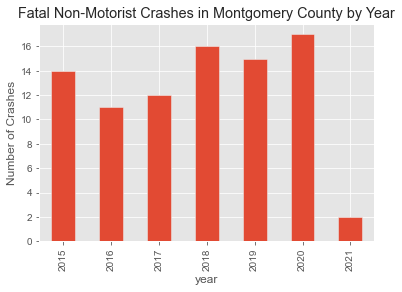

In [172]:
plt.title("Fatal Non-Motorist Crashes in Montgomery County by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")

nonMotoristFatalIncidents.groupby(['year']).size().plot(kind = 'bar')
plt.show()

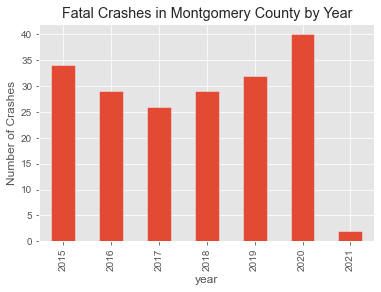

In [173]:
plt.title("Fatal Crashes in Montgomery County by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")

overallFatalIncidents.groupby(['year']).size().plot(kind = 'bar')
plt.show()

#### Discussion:  Fatality Trends


The number of fatal non-motorist crashes increased to 17 in 2020 from 12 in 2017.  That is approximately a 42% **increase**.  The *overall* number of fatal incidents increased to 40 in 2020 from 26 in 2017, an **increase** of approximately 54%.  The plots above show that both have increased overall since 2017, with a slight dip in non-motorist deaths in 2019.



In [174]:
# combine pedestrian and non-pedestrian so we can plot them side-by-side

fatalities = fatalIncidents.merge(nonMotoristFatalIncidents, on = 'report_number', how = 'outer')
fatalities.columns
fatalities.info()
fatalities.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   year_x                            193 non-null    int64         
 1   acrs_report_type_x                193 non-null    object        
 2   report_number                     193 non-null    object        
 3   related_non_motorist_x            87 non-null     object        
 4   Unnamed: 0                        87 non-null     float64       
 5   local_case_number                 87 non-null     float64       
 6   agency_name                       87 non-null     object        
 7   acrs_report_type_y                87 non-null     object        
 8   crash_date_time                   87 non-null     datetime64[ns]
 9   route_type                        87 non-null     object        
 10  road_name                         83 non-null     

,year_x,acrs_report_type_x,report_number,related_non_motorist_x,Unnamed: 0,local_case_number,agency_name,acrs_report_type_y,crash_date_time,route_type,...,pedestrian_visibility,at_fault,injury_severity,safety_equipment,latitude,longitude,location,year_y,month,month_year
0,2019,Fatal Crash,EJ7869002Y,PEDESTRIAN,447.0,190026072.0,Gaithersburg Police,Fatal Crash,2019-05-31 21:24:00,Maryland (State),...,MIXED CLOTHING,Yes,FATAL INJURY,NaN,39.161286,-77.222830,"(39.16128577, -77.22282999)",2019.0,5.0,2019-05
1,2020,Fatal Crash,MCP24920019,PEDESTRIAN,97.0,200002735.0,Montgomery County Police,Fatal Crash,2020-01-16 18:33:00,Maryland (State),...,DARK CLOTHING,Yes,FATAL INJURY,NaN,39.077990,-77.140867,"(39.07798974, -77.140867)",2020.0,1.0,2020-01
2,2020,Fatal Crash,MCP3118002T,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2019,Fatal Crash,MCP24920012,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2019,Fatal Crash,MCP2563000Y,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


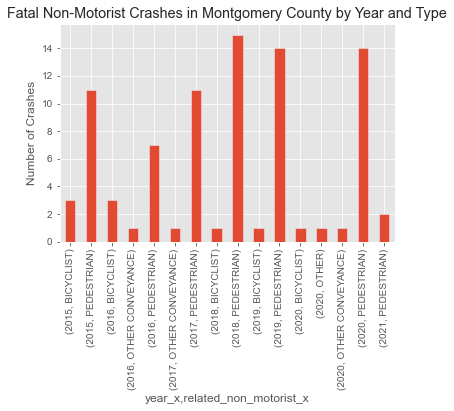

In [175]:
plt.title("Fatal Non-Motorist Crashes in Montgomery County by Year and Type")
plt.xlabel("Year and Type of Non-Motorist")
plt.ylabel("Number of Crashes")

fatalities.groupby(['year_x', 'related_non_motorist_x']).size().plot(kind='bar')

I want to plot non-motorist fatalities next to all fatalities.  To do that, I need to see what the "non-motorist" markers are in the incidents column and in the fatalities column of that name.

In [176]:
incidents['related_non_motorist'].unique()

array([nan, 'BICYCLIST', 'PEDESTRIAN', 'OTHER CONVEYANCE', 'OTHER',
       'BICYCLIST, PEDESTRIAN', 'MACHINE OPERATOR/RIDER',
       'OTHER PEDALCYCLIST', 'OTHER, PEDESTRIAN',
       'OTHER, OTHER CONVEYANCE', 'MACHINE OPERATOR/RIDER, OTHER',
       'BICYCLIST, OTHER', 'IN ANIMAL-DRAWN VEH'], dtype=object)

I suspect nan means no non-motorist is involved, but will check the original data on the webpage to confirm.  Once confirmed, I will replace "nan" with "No Non-Motorist Involved."  (Note:  in the original data, if no non-motorist was involved, the spot was left blank---thus, 'nan'.

In [177]:
# just verifying that's the case with the merged data as well
fatalities['related_non_motorist_y'].unique()

array(['PEDESTRIAN', nan, 'OTHER', 'BICYCLIST', 'OTHER CONVEYANCE'],
      dtype=object)

In [178]:
fatalities['related_non_motorist'] = fatalities['related_non_motorist_y'].fillna("No Non-Motorist Involved")
fatalities['related_non_motorist'].unique()

array(['PEDESTRIAN', 'No Non-Motorist Involved', 'OTHER', 'BICYCLIST',
       'OTHER CONVEYANCE'], dtype=object)

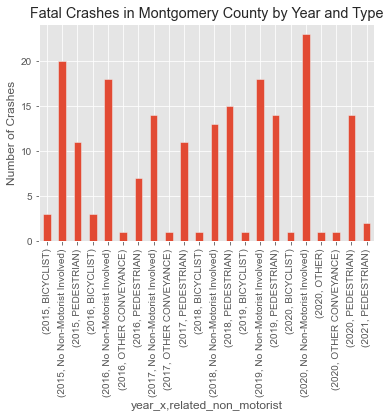

In [179]:
plt.title("Fatal Crashes in Montgomery County by Year and Type")
plt.xlabel("Year and Type of Crash")
plt.ylabel("Number of Crashes")

fatalities.groupby(['year_x', 'related_non_motorist']).size().plot(kind='bar')

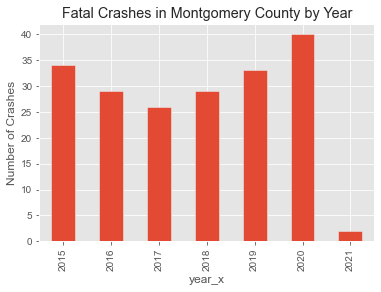

In [180]:
plt.title("Fatal Crashes in Montgomery County by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
fatalities.groupby(['year_x']).size().plot(kind='bar')

In [181]:
fatalities.groupby(['year_x']).size()

year_x
2015    34
2016    29
2017    26
2018    29
2019    33
2020    40
2021     2
dtype: int64

In [182]:
# Add a column for year
drivers['year'] = pd.DatetimeIndex(drivers['crash_date_time']).year
drivers.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,driverless_vehicle,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude,longitude,location,year
0,1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,...,No,No,2020,UNKNOWN,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)",2020
1,2,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,...,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)",2020
2,3,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,...,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)",2020
3,4,MCP27100039,200016305,Montgomery County Police,Property Damage Crash,2020-04-17 17:00:00,Municipality,E DIAMOND AVE,Municipality,S SUMMIT AVE,...,No,No,2011,TOYOTA,4S,NaN,39.140555,-77.193347,"(39.140555, -77.19334667)",2020
4,5,DD5641000P,200016622,Rockville Police,Property Damage Crash,2020-04-21 06:45:00,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,...,No,No,2018,TOYOTA,4S,NO MISUSE,39.066925,-77.154085,"(39.066925, -77.154085)",2020


In [183]:
#Add a column for month
drivers['month'] = pd.DatetimeIndex(drivers['crash_date_time']).month
drivers.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude,longitude,location,year,month
0,1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,...,No,2020,UNKNOWN,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)",2020,6
1,2,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,...,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)",2020,4
2,3,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,...,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)",2020,4
3,4,MCP27100039,200016305,Montgomery County Police,Property Damage Crash,2020-04-17 17:00:00,Municipality,E DIAMOND AVE,Municipality,S SUMMIT AVE,...,No,2011,TOYOTA,4S,NaN,39.140555,-77.193347,"(39.140555, -77.19334667)",2020,4
4,5,DD5641000P,200016622,Rockville Police,Property Damage Crash,2020-04-21 06:45:00,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,...,No,2018,TOYOTA,4S,NO MISUSE,39.066925,-77.154085,"(39.066925, -77.154085)",2020,4


In [184]:
# Add a column for month and year
drivers['month_year'] = pd.to_datetime(drivers['crash_date_time']).dt.to_period('M')
drivers.head()

,Unnamed: 0,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,...,vehicle_year,vehicle_make,vehicle_model,equipment_problems,latitude,longitude,location,year,month,month_year
0,1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,...,2020,UNKNOWN,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)",2020,6,2020-06
1,2,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,...,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)",2020,4,2020-04
2,3,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,...,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)",2020,4,2020-04
3,4,MCP27100039,200016305,Montgomery County Police,Property Damage Crash,2020-04-17 17:00:00,Municipality,E DIAMOND AVE,Municipality,S SUMMIT AVE,...,2011,TOYOTA,4S,NaN,39.140555,-77.193347,"(39.140555, -77.19334667)",2020,4,2020-04
4,5,DD5641000P,200016622,Rockville Police,Property Damage Crash,2020-04-21 06:45:00,Municipality,WOOTTON PKWY,Municipality,TOWER OAKS BLVD,...,2018,TOYOTA,4S,NO MISUSE,39.066925,-77.154085,"(39.066925, -77.154085)",2020,4,2020-04


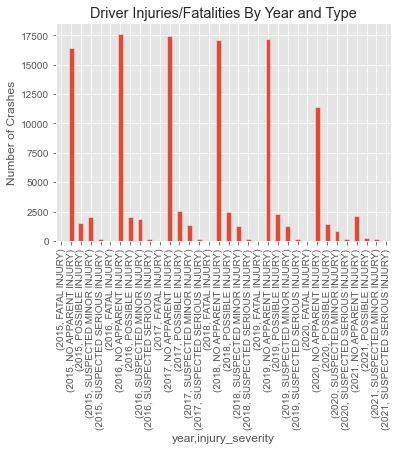

In [185]:
plt.title("Driver Injuries/Fatalities By Year and Type")
plt.xlabel("Year and Type")
plt.ylabel("Number of Crashes")

drivers.groupby(['year', 'injury_severity']).size().plot(kind= 'bar')

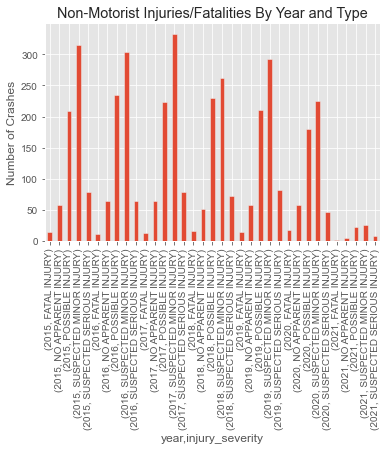

In [186]:
plt.title("Non-Motorist Injuries/Fatalities By Year and Type")
plt.xlabel("Year and Type")
plt.ylabel("Number of Crashes")

nonmotorists.groupby(['year', 'injury_severity']).size().plot(kind = 'bar')

That's obviously way too detailed to be of use.

In [187]:
# Extract the "suspected serious injury" cases from the data
seriousInjuries = drivers['injury_severity'] == 'SUSPECTED SERIOUS INJURY'
seriousInjuryDriver = drivers[seriousInjuries]
seriousInjuryDriver['injury_severity']

24        SUSPECTED SERIOUS INJURY
317       SUSPECTED SERIOUS INJURY
955       SUSPECTED SERIOUS INJURY
1012      SUSPECTED SERIOUS INJURY
1072      SUSPECTED SERIOUS INJURY
                    ...           
121570    SUSPECTED SERIOUS INJURY
121721    SUSPECTED SERIOUS INJURY
121728    SUSPECTED SERIOUS INJURY
121740    SUSPECTED SERIOUS INJURY
121769    SUSPECTED SERIOUS INJURY
Name: injury_severity, Length: 1034, dtype: object

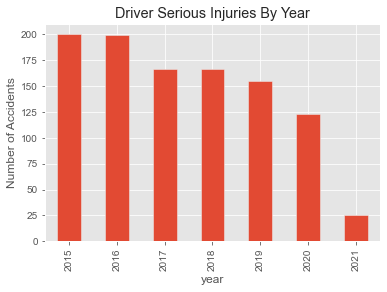

In [188]:
plt.title("Driver Serious Injuries By Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
seriousInjuryDriver.groupby(['year']).size().plot(kind = 'bar')

In [189]:
seriousInjuryDriver.groupby(['year']).size()

year
2015    200
2016    199
2017    166
2018    166
2019    155
2020    123
2021     25
dtype: int64

In [190]:
seriousInjuriesN = nonmotorists['injury_severity'] == 'SUSPECTED SERIOUS INJURY'
seriousInjuryNonDriver = nonmotorists[seriousInjuriesN]
seriousInjuryNonDriver['injury_severity']

10      SUSPECTED SERIOUS INJURY
15      SUSPECTED SERIOUS INJURY
21      SUSPECTED SERIOUS INJURY
45      SUSPECTED SERIOUS INJURY
46      SUSPECTED SERIOUS INJURY
                  ...           
3882    SUSPECTED SERIOUS INJURY
3902    SUSPECTED SERIOUS INJURY
3906    SUSPECTED SERIOUS INJURY
3919    SUSPECTED SERIOUS INJURY
3934    SUSPECTED SERIOUS INJURY
Name: injury_severity, Length: 429, dtype: object

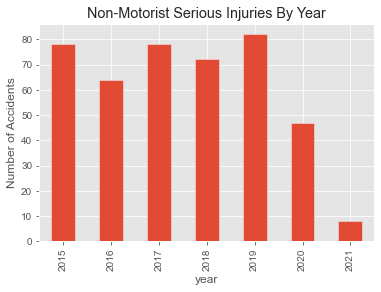

In [191]:
plt.title("Non-Motorist Serious Injuries By Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")

seriousInjuryNonDriver.groupby(['year']).size().plot(kind = 'bar')

In [192]:
seriousInjuryNonDriver.groupby(['year']).size()

year
2015    78
2016    64
2017    78
2018    72
2019    82
2020    47
2021     8
dtype: int64

#### Discussion:

In its first two-year plan, Montgomery County set a target of a 35% reduction in severe and fatal collisions for all roadway users by 2019.  This meants 180 motorists/people in vehicles, 49 pedestrians, and 11 cyclists, for a total of 240.  In reality, according to the data above, 270 motorists and non-motorists suffered serious injuries or fatalities in crashes in 2019.  In 2019, the county missed its target by 30 people.

In 2020, the target was 221 total, or 166 motorists/people in vehicles, 45 pedestrians, and 10 cyclists.  The data show that 210 people were seriously or fatally injured in 2020, which is 11 below the target.



## Location of Crashes

In [193]:
countyMap = gpd.read_file("street_centerline/street_centerline.shp")


NameError: name 'gpd' is not defined

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
countyMap.plot(ax = ax, color = 'blue')
plt.title("Roadways in Montgomery County, Maryland")

In [ ]:
# Determine latitude, longitude names, and plot to map base above
fatalities.columns


In [ ]:
fatalitiesGeometry = [Point(xy) for xy in zip(fatalities["longitude"], fatalities["latitude"])]
fatalitiesGeometry[:3]

In [ ]:
geo_fatalities = gpd.GeoDataFrame(fatalities, geometry= fatalitiesGeometry)
geo_fatalities.head()

In [ ]:
seriousInjuryDriver.columns

In [ ]:
seriousInjuryDriverGeometry = [Point(xy) for xy in zip(seriousInjuryDriver["longitude"], seriousInjuryDriver["latitude"])]
seriousInjuryDriverGeometry[:3]

In [ ]:
geo_seriousInjuryDriver = gpd.GeoDataFrame(seriousInjuryDriver, geometry= seriousInjuryDriverGeometry)
geo_seriousInjuryDriver.head()

In [ ]:
seriousInjuryNonDriver.columns

In [ ]:
seriousInjuryNonDriverGeometry = [Point(xy) for xy in zip(seriousInjuryNonDriver["longitude"], seriousInjuryNonDriver["latitude"])]
seriousInjuryNonDriverGeometry[:3]

In [ ]:
geo_seriousInjuryNonDriver = gpd.GeoDataFrame(seriousInjuryNonDriver, geometry= seriousInjuryNonDriverGeometry)
geo_seriousInjuryNonDriver.head()

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
countyMap.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_fatalities[geo_fatalities['acrs_report_type_y']== 'Fatal Crash'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = "Fatal Crash")
geo_seriousInjuryDriver[geo_seriousInjuryDriver['acrs_report_type']== 'Injury Crash'].plot(ax = ax, markersize = 20, color ='blue', marker = 'o', label ="Serious Injury in Car")
geo_seriousInjuryNonDriver[geo_seriousInjuryNonDriver['acrs_report_type']== 'Injury Crash'].plot(ax = ax, markersize = 20, color ='green', marker = 'o', label ="Serious Non-Motorist Injury") 
plt.legend()
ax.set_title("Road Accidents in Montgomery County, Maryland, 2015-2021")